Mean Squared Error: 0.7085289608400881
R^2 Score: 0.9999508694637779


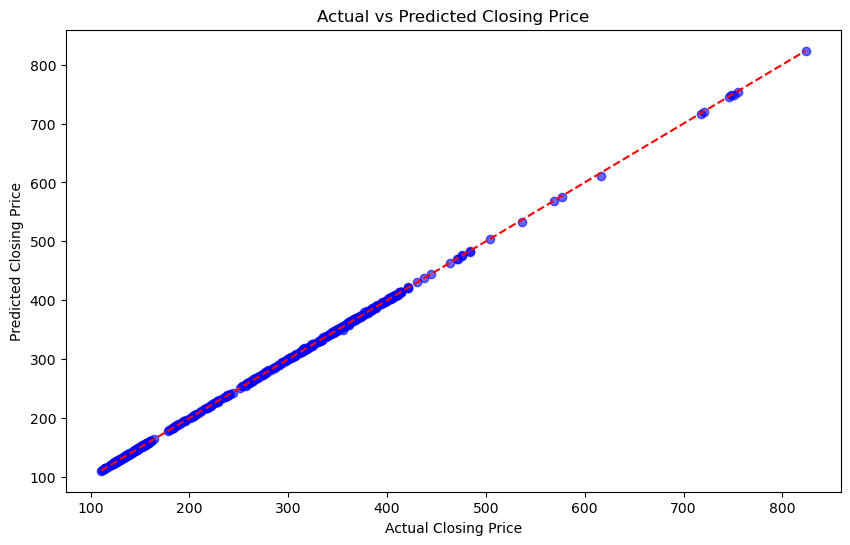

              Feature   Coefficient
4                Last  8.176302e-01
5                VWAP  2.633923e-01
9         %Deliverble  4.114462e-02
3                 Low  9.606525e-03
6              Volume  5.795481e-08
7            Turnover -6.550239e-16
8  Deliverable Volume -4.562234e-08
0          Prev Close -2.266971e-03
1                Open -4.372031e-02
2                High -4.379550e-02


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('ADANIPORTS.csv')

# Preprocessing
# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Drop rows with missing values
data = data.dropna()

# Features and target
# Using numerical features to predict the Close price
features = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume', '%Deliverble']
X = data[features]
y = data['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal prediction line
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs Predicted Closing Price')
plt.show()

# Print model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))
